<a href="https://colab.research.google.com/github/okdarnoc/A.I._CV_Scanner_Pro/blob/main/A_I__CV_Scanner_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 Resume Review Automation Program: A.I._CV_Scanner_Pro 🤖

This program, **A.I._CV_Scanner_Pro**, streamlines the CV/Resume review process for job applicants by extracting relevant information, summarizing it, and then saving the results in an easily accessible format.

## 🙋 Who Would Benefit?
Recruiters and hiring managers will find this tool incredibly valuable as it significantly reduces the time and effort required to sift through numerous CVs/Resumes to find the most suitable candidate for a job opening.

## 🛠 How to use this program?
1. Just press the "Play" button below
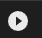
2. Follow the 🛠 How Does It Work? part of this dowcument.


## 🛠 How Does It Work?

1. **🔗 Mount Google Drive**
   - Run the program to mount your Google Drive.
   - A link will appear. Click on it and select your Google account.
   - Authorize the program to access your Google Drive.

2. **📁 Input Folder and File Names**
   - Enter the Google Drive folder name containing CV/Resume files. If you don't have a folder full of CVs/Resumes, don't worry. Type any name, and the program will create a folder for you with that name.
     ```
     Example: JobApplications
     ```
   - Enter the names for the output JSON and CSV files. These will store the summaries of the CVs, allowing you to compare and contrast candidates.
     ```
     Example: CandidateSummaries
     ```

3. **🔍 Provide Job Details**
   - Input the employer's company background information.
     ```
     Example: We are a tech company specializing in AI solutions.
     ```
   - Input the job title, duties, and requirements.
     ```
     Job Title Example: Software Engineer
     Job Duties Example: Develop software applications and conduct testing.
     Job Requirements Example: At least 2 years of experience in software development.
     ```

4. **🤔 Specify Questions**
   - Input specific questions you wish to ask the candidate.
     ```
     Example: Does the candidate have any experience working in China?
     ```

5. **📤 Upload Additional Files (Optional)**
   - If you want to upload additional CV/Resume files to the folder you provided, type '1' when prompted.
   - Use the file chooser that appears to select files from your computer.
   - If you don't want to upload any files, type '2'.

6. **🔑 API Key and Model Input**
   - Input your OpenAI API Key. You can obtain an OpenAI API Key from their website.
     ```
     Example: sk-abc123XYZ
     ```
   - Input the desired OpenAI Model, such as gpt-4 or gpt-3.5-turbo.
     ```
     Example: gpt-3.5-turbo
     ```
  - If you are not sure how to get an OpenAI API Key, you can watch this video
  https://www.youtube.com/watch?v=EQQjdwdVQ-M


7. **📊 Review Results**
   - After the program processes the data, review the JSON and CSV files in your Google Drive folder.
   - The files will be named according to your input in Step 2 and will contain summarized information and answers to your specific questions for each candidate.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
!pip install docx2txt
!pip install PyPDF2
!pip install openai
from google.colab import drive
from google.colab import files
import PyPDF2
import docx2txt
import pandas as pd
import openai
import os
import json

# Ask the user for the name of the folder where CV/Resume files are stored on Google Drive
input_folder_name = input("Enter the name of the folder under your Google Drive where you want to search for CV/Resume files: ")

# Ask the user for the desired name of the output files (excluding file extension)
output_file_name = input("Enter the file name (excluding extension) for both the JSON and CSV files. For example, if you want your output files to be 'cvsummary.json' and 'cvsummary.csv', simply type 'cvsummary': ")

# Ask the user for information about the company's background
company_background = input("Enter the company's background information: ")

# Ask the user to specify the duties associated with the job
job_duties = input("Enter the job duties: ")

# Ask the user to specify the requirements for the job
job_requirements = input("Enter the job requirements: ")

# Ask the user to provide specific questions they wish to ask the candidate
manualquestions = input("Enter specific questions you would like to ask the candidate. Please be as detailed as possible: ")

# Ask the user to specify the job title
job_title = input("Enter the job title: ")

# Path to your Google Drive's root directory
drive_root = '/content/drive/MyDrive/'

# Folder where you want to save the files
folder_path = os.path.join(drive_root, input_folder_name)

# Create folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ask user if they want to upload files
while True:
    upload_files = input("Do you want to upload CV/Resume files into the folder? Please type 1 for yes or 2 for no: ")
    if upload_files == '1':
        print("Please select the CV/Resume files you want to upload. You can upload multiple files at once.")
        uploaded_files = files.upload()

        # Save uploaded files to the specified folder
        for filename in uploaded_files.keys():
            with open(os.path.join(folder_path, filename), 'wb') as f:
                f.write(uploaded_files[filename])

        print(f"Files have been uploaded to {folder_path}")
        break
    elif upload_files == '2':
        print("No files will be uploaded. Continuing with the program...")
        break
    else:
        print("Invalid response. Please enter '1' or '2'.")

# Function to Extract Text from PDF
def extract_text_from_pdf(pdf_file):
    try:
        with open(pdf_file, "rb") as pdf:
            pdf_reader = PyPDF2.PdfReader(pdf)
            num_pages = len(pdf_reader.pages)
            pdf_text = "".join([pdf_reader.pages[page].extract_text() for page in range(num_pages)])
        return pdf_text
    except Exception as e:
        print(f"Failed to read PDF: {e}")
        return None


# Function to Extract Text from DOCX
def extract_text_from_docx(docx_file):
    try:
        return docx2txt.process(docx_file)
    except Exception as e:
        print(f"Failed to read DOCX: {e}")
        return None

# Fetch API Key from environment variables
openai.api_key = input("Please provide the OpenAI API Key")

# Fetch API Key from environment variables
openaimodel = input("Please input the OpenAI Model you want to use， like gpt-4, gpt-3.5-turbo, gpt-3.5-turbo-16k")

# Function to Summarize using GPT-4
def formulate_question_using_chat_gpt(job_title, company_background, job_duties, job_requirements,manualquestions):
    try:
        response = openai.ChatCompletion.create(
            model= openaimodel,
            messages=[
                {
                    "role": "system",
                    "content": f"""
                    You are a senior recruiter, you are generating a set of questions that can be used to summarize a person's CV/Resume and consider whether the candidate is a fit for a job for the company.
                    You should generate around 20 questions to summarize verify whether the candidate is a fit,  based on basic information of the candidates, company background, job duties and job requirements.
                    Focus on answering manual questions first.
                    You must ask the following, Candidates english name, Candiates chinese name, Candidate expected salary, Candidate Email, Candidates Phone Number, Candidate availability, candidates linkedin, candidates wechat, candidates expected salary, candidates last salary if any.
                    It recommended you create some questions that rate the cadidate fitness on a 1-10 scale and a follow up question explaining why the rank apply,the rating questions should be very role specifc and detail.
                    Don't seperate the questions into groups, just make it in the same group/set.
                    You should also generate a sample answers to the question as well in json format.
                    Format the output in RFC8259 compliant JSON format, using UTF-8 encoding.
                    The json output will be used in another program in conjunction with candidates CV/resume to provide valuable output.
                    Only provide the JSON output, nothing else.

                    Sample Output:
                    "What's the candidate's english name":"Conrad Ko"
                    "what's the candiates's phone number":"+85293475637"
                    "Question1": "SampleAnswer1",
                    "Question2": "SampleAnswer2",
                    "Question3": "SampleAnswer3",
                    "Question4": "SampleAnswer4",

                    """
                },
                {
                    "role": "user",
                    "content": f"""

                    Company Background:
                    {company_background}

                    Job Title:
                    {job_title}

                    Job Duties:
                    {job_duties}

                    Job Requirements:
                    {job_requirements}

                    Manual Questions:
                    {manualquestions}
                    """
                },
            ],
            temperature=0.2,
        )
        questions = response['choices'][0]['message']['content']
        return questions
    except Exception as e:
        print(f"Failed to generate question: {e}")
        return None

questions = formulate_question_using_chat_gpt(job_title, company_background, job_duties, job_requirements, manualquestions)
print(questions)

# Function to Summarize using GPT-4
def summarize_using_chat_gpt(cv,questions):
    try:
        response = openai.ChatCompletion.create(
            model= openaimodel,
            messages=[
                {
                    "role": "system","content": f"""
                    Give well-reasoned and critical assessments with solid evidence from the CV/Resume.
                    Include specific details such as names, years, company names, job titles, institutions, and other relevant information.
                    Be very detail oriented.
                    Use both English and Chinese for all nouns and terms.
                    Write as if you are a very seasoned recruiter with keen eye on details and focus on the merit and background of the candidate.
                    If information is unavailable or unknown, input "N/A".
                    If the country code for the phone number is not indicated, the default is Hong Kong +852.
                    Format the output in RFC8259 compliant JSON format, using UTF-8 encoding.
                    Output should be ready for presentation to the client and reference during the interview process.

                    Only provide the JSON output, nothing else."""},
                {
                    "role": "user",
                    "content": f"""

                    CV/Resume:
                    {cv}


                    Question we want to ask and you should generate json output on:
                    {questions}
"""
                }
            ],
            temperature=0.2
        )
        summary = response['choices'][0]['message']['content']
        return summary
    except Exception as e:
        print(f"Failed to summarize: {e}")
        return None


# Initialize an empty dictionary to store summaries
summaries_dict = {}
summaries_list = []

# Main File Processing Loop
try:
    for file_name in os.listdir(folder_path):
        try:
            file_path = os.path.join(folder_path, file_name)
            extracted_text = None
            if file_name.endswith('.pdf'):
                extracted_text = extract_text_from_pdf(file_path)
            elif file_name.endswith('.docx'):
                extracted_text = extract_text_from_docx(file_path)
            else:
                print(f"Skipping unsupported file type: {file_path}")
                continue

            if extracted_text:
                summary = summarize_using_chat_gpt(extracted_text,questions)
                print(summary)

                try:
                    summary_dict = json.loads(summary)
                    print(summary_dict)

                    # Adding the file_name to summary_dict
                    summary_dict['file_name'] = file_name

                    # Adding the summary_dict to summaries_list
                    summaries_list.append(summary_dict)

                    # Save the updated summaries list to a JSON file with utf-8 encoding
                    json_file_path = f"{folder_path}/{output_file_name}.json"
                    with open(json_file_path, 'w', encoding='utf-8') as json_file:
                        json.dump(summaries_list, json_file, indent=4, ensure_ascii=False)
                    print("JSON file saved at:", json_file_path,"You can check it in your google drive")

                    # Save the updated summaries list to a CSV file with utf-8 encoding
                    csv_file_path = f"{folder_path}/{output_file_name}.csv"
                    df = pd.DataFrame(summaries_list)
                    df.to_csv(csv_file_path, index=False, encoding='utf-8')
                    print("CSV file saved at:", csv_file_path,"You can check it in your google drive")

                except json.JSONDecodeError as e:
                    print("Error parsing JSON:", e)
                    continue

        except Exception as e:
            if "is not a Word file" in str(e):
                print(f"Skipping file due to error: {e}")
            else:
                print(f"An unforeseen error occurred: {e}")

except Exception as e:
    print(f"An unforeseen error occurred in the main loop: {e}")

# 🧠 Question Generation Mechanism

The A.I._CV_Scanner_Pro program generates questions based on the job details provided by the user. The mechanism involves three main steps:

## 1. **Extracting Key Information:**
   - The program first extracts key information from the job title, duties, and requirements input by the user.
   - Natural Language Processing (NLP) techniques are used to identify important keywords and phrases.

## 2. **Generating Question Templates:**
   - Based on the extracted information, the program generates question templates.
   - These templates are pre-defined structures that allow the program to ask relevant questions about the candidate's experience and qualifications related to the job.

## 3. **Filling in the Templates:**
   - The program then fills in the question templates with the specific job-related keywords and phrases extracted in the first step.
   - This results in tailored questions that are directly relevant to the job opening.

## 📋 Example:
If the job title is "Software Engineer", the duties include "Develop software applications", and the requirements specify "At least 2 years of experience in software development", the program may generate questions like:
   - "Does the candidate have experience in developing software applications?"
   - "Has the candidate worked as a software engineer for at least 2 years?"
   
This mechanism ensures that the questions are specific, relevant, and targeted to help recruiters and hiring managers quickly assess whether the candidate is a good fit for the job.



# 🤔 Question Answering Mechanism 🤓

Once the A.I._CV_Scanner_Pro program has generated the questions, it then extracts relevant information from the CVs/Resumes to answer them. The mechanism involves the following steps:

## 1. **Information Extraction:**
   - The program utilizes Natural Language Processing (NLP) techniques to extract relevant information from the CVs/Resumes.
   - It identifies and extracts key skills, experiences, and qualifications that are relevant to the job.

## 2. **Matching Questions to Answers:**
   - The program then matches the extracted information to the specific questions generated earlier.
   - It maps the relevant skills, experiences, and qualifications to the corresponding questions.

## 3. **Generating Responses:**
   - Finally, the program generates responses to the questions based on the matched information.
   - It formulates clear and concise answers that directly address the questions.

## 📋 Example:
If the question is "Does the candidate have experience in developing software applications?", the program will:
   1. Extract relevant experiences from the CV.
   2. Match the extracted experiences to the question.
   3. Generate a response such as "Yes, the candidate has 3 years of experience in developing software applications at XYZ Company."

This mechanism ensures that the responses are accurate, relevant, and directly address the questions, helping recruiters and hiring managers make informed decisions.# New Section